In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metric

import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import explore as e

## 1. Load your zillow dataset.

In [4]:
zillow = w.wrangle_zillow()

In [5]:
zillow.shape

(1854411, 7)

In [3]:
train, validate, test = w.train_validate_test_split(zillow)

In [4]:
X_train = train[['square_feet']]
y_train = train.tax_value

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of ```taxvaluedollarcnt``` using only ```calculatedfinishedsqft```.

In [5]:
# generate parameters, i.e. create model
ols_model = LinearRegression().fit(X_train, y_train)

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(X_train)

In [6]:
train = train.drop(columns=['bedrooms', 'bathrooms', 'year_built', 
                   'taxamount', 'fips'])

In [7]:
train.head()

,square_feet,tax_value,yhat
1569291,1281.0,227020.0,272315.499883
1155731,1300.0,486700.0,275150.893648
146488,2521.0,424287.0,457362.250856
1223991,1349.0,327116.0,282463.224936
269816,2399.0,369553.0,439156.038260


## 3. Plot the residuals for the linear regression model that you made.

In [8]:
# compute residuals
train['residual'] = y_train - train['yhat']

In [9]:
train.head()

,square_feet,tax_value,yhat,residual
1569291,1281.0,227020.0,272315.499883,-45295.499883
1155731,1300.0,486700.0,275150.893648,211549.106352
146488,2521.0,424287.0,457362.250856,-33075.250856
1223991,1349.0,327116.0,282463.224936,44652.775064
269816,2399.0,369553.0,439156.038260,-69603.038260


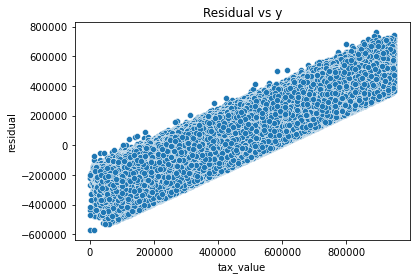

In [10]:
sns.scatterplot(data=train, x='tax_value', y='residual');
plt.title('Residual vs y')
plt.show()

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [11]:
train['residual^2'] = train.residual ** 2

In [12]:
train.head()

,square_feet,tax_value,yhat,residual,residual^2
1569291,1281.0,227020.0,272315.499883,-45295.499883,2.051682e+09
1155731,1300.0,486700.0,275150.893648,211549.106352,4.475302e+10
146488,2521.0,424287.0,457362.250856,-33075.250856,1.093972e+09
1223991,1349.0,327116.0,282463.224936,44652.775064,1.993870e+09
269816,2399.0,369553.0,439156.038260,-69603.038260,4.844583e+09


In [13]:
# Sum of squared errors
SSE = sum(train['residual^2'])
print(f"SSE = {SSE}")

SSE = 3.920267174056877e+16


In [14]:
#Explained sum of squares
ESS = sum((train.yhat - y_train.mean())**2)
print(f'ESS = {ESS}')

ESS = 8555751516493159.0


In [15]:
#Total sum of squares
TSS = ESS + SSE
print(f'TSS = {TSS}')

TSS = 4.775842325706193e+16


In [16]:
#Mean of squared error
MSE = SSE/len(train)

print(f"MSE = {MSE}")

MSE = 32510944113.655132


In [17]:
#Root mean squared error
from math import sqrt
RMSE = sqrt(MSE)

print(f"RMSE = {RMSE}")

RMSE = 180307.9147282646


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [18]:
train['yhat_baseline'] = y_train.mean()

In [19]:
train['residual_baseline'] = train['yhat_baseline'] - y_train

In [20]:
train['residual_baseline^2'] = train.residual_baseline ** 2

In [21]:
#Sum of squared errors
SSE_baseline = sum(train['residual_baseline^2'])
print(f"SSE - baseline = {SSE_baseline}")

SSE - baseline = 4.775842325705968e+16


In [22]:
#Mean squared error
MSE_baseline = SSE_baseline/len(train)
print(f"MSE - baseline = {MSE_baseline}", )

MSE - baseline = 39606265607.1417


In [23]:
#Root mean squared error
RMSE_baseline = sqrt(MSE_baseline)
print(f"RMSE - baseline = {RMSE_baseline}")

RMSE - baseline = 199013.22972893462


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [24]:
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])
print(f"SSE = {SSE}")
print(f"SSE for baseline = {SSE_baseline}")

if SSE < SSE_baseline:
    print('Your model performs better than basline model!')
else:
    print('Your model performs worse or equal to the baseline model.')
    


SSE = 3.920267174056877e+16
SSE for baseline = 4.775842325705968e+16
Your model performs better than basline model!


## 7. What is the amount of variance explained in your model?

In [25]:
evs = metric.explained_variance_score(train.tax_value, train.yhat)
print(f'Explained Variance = {evs}')

Explained Variance = 0.17914644020884785


In [26]:
r2 = metric.r2_score(y_train, train.yhat)
print(f'R2 score = {r2}')

R2 score = 0.17914644020884773


## 8. Is your model better than the baseline model?

In [27]:
RMSE_baseline - RMSE

18705.31500067003

Better than baseline

## 9. Create a file named evaluate.py that contains the following functions.

- ```plot_residuals(y, yhat)```: creates a residual plot

- ```regression_errors(y, yhat)```: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- ```baseline_mean_errors(y)```: computes the SSE, MSE, and RMSE for the baseline model
- ```better_than_baseline(y, yhat)```: returns true if your model performs better than the baseline, otherwise false



In [28]:
def plot_residuals(y, yhat):
    residuals = y - yhat
    sns.scatterplot(x=y, y=residuals)
    plt.title('Residuals vs. y')
    plt.show()

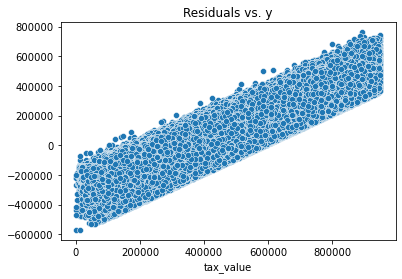

In [29]:
plot_residuals(train.tax_value, train.yhat)

In [30]:
def regression_errors(y, yhat):
    MSE = metric.mean_squared_error(y, yhat)
    SSE = MSE*len(y)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    RMSE = sqrt(MSE)
    
    return SSE, ESS, TSS, MSE, RMSE

In [31]:
regression_errors(train.tax_value, train.yhat)

(3.920267174056921e+16,
 8555751516493159.0,
 4.775842325706237e+16,
 32510944113.6555,
 180307.9147282656)

In [32]:
def baseline_mean_errors(y):
    baseline = np.repeat(y.mean(), len(y))
    
    MSE = metric.mean_squared_error(y, baseline)
    SSE = MSE*len(y)
    RSME = sqrt(MSE)
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [33]:
baseline_mean_errors(y_train)

(4.775842325705968e+16, 39606265607.1417, 199013.22972893462)

In [34]:
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        return True
    

In [35]:
better_than_baseline(train.tax_value, train.yhat)

True